<a href="https://colab.research.google.com/github/hscrown/madatpublicdata/blob/main/SVD%EB%A5%BC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC_%EC%82%AC%EC%9D%B4%ED%82%A5%EB%9F%B0%EC%9C%BC%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

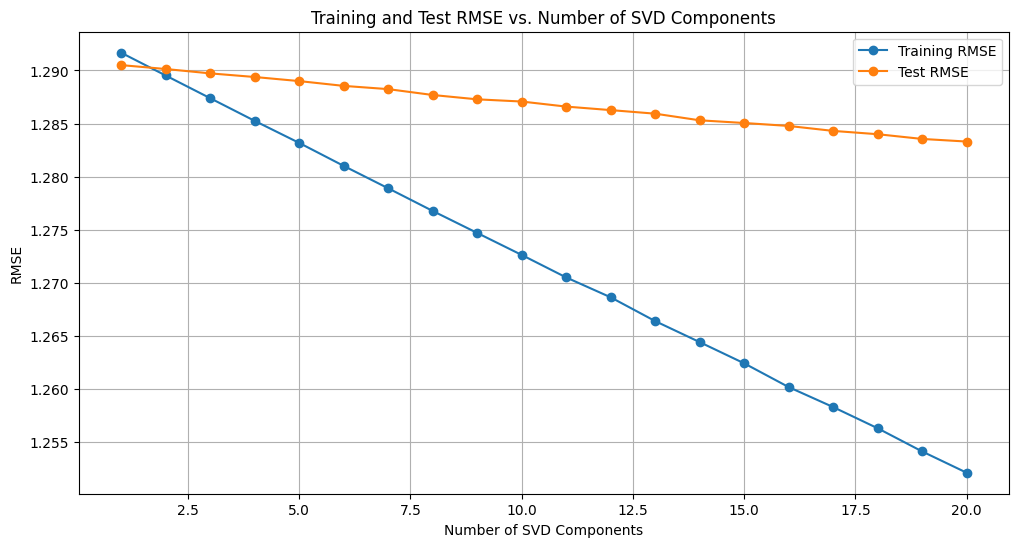

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('user_rating_1000.csv')

# 0점 평점을 제외하고 데이터 프레임에서 피벗 테이블 생성
non_zero_df = df[df['rating'] != 0]
pivot_table = non_zero_df.pivot(index='user_id', columns='place_id', values='rating')

# 결측치 처리
pivot_table_filled = pivot_table.apply(lambda x: x.fillna(x.mean()), axis=1)

# 데이터 배열로 변환
ratings_matrix = pivot_table_filled.values

# 훈련 데이터와 테스트 데이터로 나누기
train_data, test_data = train_test_split(ratings_matrix, test_size=0.2, random_state=42)

# RMSE를 저장할 리스트 초기화
train_rmse_list = []
test_rmse_list = []

# SVD의 컴포넌트 수에 따른 반복
n_components_range = range(1, 21)
for n_components in n_components_range:
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    svd.fit(train_data)

    # 훈련 데이터와 테스트 데이터에 대한 예측
    train_predictions = svd.inverse_transform(svd.transform(train_data))
    test_predictions = svd.inverse_transform(svd.transform(test_data))

    # 훈련 데이터와 테스트 데이터의 RMSE 계산
    train_rmse = np.sqrt(mean_squared_error(train_data, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(test_data, test_predictions))

    # RMSE 결과 저장
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

# RMSE 시각화
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, train_rmse_list, marker='o', label='Training RMSE')
plt.plot(n_components_range, test_rmse_list, marker='o', label='Test RMSE')
plt.title('Training and Test RMSE vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# 전체 데이터에 대한 예측 평점 계산
all_predictions = svd_optimal.inverse_transform(svd_optimal.transform(ratings_matrix))


In [13]:
# User ID 11의 실제 평점과 예측 평점 비교
user_id = 11
user_index = pivot_table.index.get_loc(user_id)

# 실제와 예측 평점 데이터프레임 생성
actual_ratings = pivot_table.iloc[user_index]
predicted_ratings = pd.Series(all_predictions[user_index], index=pivot_table.columns)

comparison_df = pd.DataFrame({
    'Actual Rating': actual_ratings,
    'Predicted Rating': predicted_ratings
}).dropna()

# 실제 평점과 예측 평점 비교 출력 (상위 5개)
print(comparison_df.head(5))

# 평점이 0인 데이터에 대한 예측 평점 계산
zero_ratings_df = df[(df['rating'] == 0) & (df['user_id'] == user_id)]
zero_predictions = []

for _, row in zero_ratings_df.iterrows():
    place_id = row['place_id']
    if place_id in pivot_table.columns:
        place_index = pivot_table.columns.get_loc(place_id)
        predicted_rating = predicted_ratings[place_id]
        zero_predictions.append((place_id, predicted_rating))

# 상위 5개 예측 평점 출력
zero_predictions_sorted = sorted(zero_predictions, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Predicted Ratings for User ID 11 (Unrated Items):")
for place_id, rating in zero_predictions_sorted:
    print(f"Place ID: {place_id}, Predicted Rating: {rating}")

          Actual Rating  Predicted Rating
place_id                                 
0                   4.0          2.865360
1                   4.5          3.665680
2                   5.0          3.324747
3                   5.0          3.021542
4                   5.0          3.706649
Top 5 Predicted Ratings for User ID 11 (Unrated Items):
Place ID: 655.0, Predicted Rating: 4.049138974285964
Place ID: 166.0, Predicted Rating: 3.9363173984225233
Place ID: 93.0, Predicted Rating: 3.891103162052021
Place ID: 630.0, Predicted Rating: 3.8897825831166752
Place ID: 903.0, Predicted Rating: 3.8685589828877536
